# Surat Flats Dataset

#### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### Load the Dataset

In [2]:
df = pd.read_csv(r"surat_uncleaned.csv")

In [3]:
df.shape

(4525, 11)

In [4]:
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [6]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64

In [7]:
df.describe().T

,count,unique,top,freq
property_name,4525,1992,3 BHK Apartment for Sale in Vesu Surat,93
areaWithType,4525,6,Super Area,2599
square_feet,4525,1399,1000 sqft,77
transaction,4421,38,Resale,2197
status,4524,138,Ready to Move,3078
floor,4480,222,Resale,431
furnishing,4185,78,Unfurnished,2322
facing,3936,176,East,1487
description,3154,2588,Multistorey apartment is available for sale. I...,35
price_per_sqft,4157,2134,"₹6,000 per sqft",64


In [8]:
df["price"].unique()

array(['₹33.8 Lac ', '₹45.4 Lac ', '₹44.6 Lac ', '₹47 Lac ', '₹45 Lac ',
       '₹43.2 Lac ', '₹42.1 Lac ', '₹44.1 Lac ', '₹44.3 Lac ', '₹40 Lac ',
       '₹44 Lac ', '₹12.5 Lac ', '₹50 Lac ', '₹35.8 Lac ', '₹26.5 Lac ',
       '₹42 Lac ', '₹43 Lac ', '₹20 Lac ', '₹37 Lac ', '₹29 Lac ',
       '₹38 Lac ', '₹13 Lac ', '₹46.5 Lac ', '₹41.6 Lac ', '₹33.5 Lac ',
       '₹42.5 Lac ', '₹48 Lac ', '₹32 Lac ', '₹35 Lac ', '₹46.2 Lac ',
       '₹38.5 Lac ', '₹23 Lac ', '₹24 Lac ', '₹28 Lac ', '₹35.7 Lac ',
       '₹36.5 Lac ', '₹36 Lac ', '₹43.6 Lac ', '₹25 Lac ', '₹41 Lac ',
       '₹28.5 Lac ', '₹9 Lac ', '₹30 Lac ', '₹39.5 Lac ', '₹21.5 Lac ',
       '₹10.5 Lac ', '₹18 Lac ', '₹10 Lac ', '₹23.5 Lac ', '₹16.3 Lac ',
       '₹13.5 Lac ', '₹49 Lac ', '₹21 Lac ', '₹39 Lac ', '₹16 Lac ',
       '₹27 Lac ', '₹15 Lac ', '₹39.9 Lac ', '₹7.5 Lac ', '₹12.8 Lac ',
       '₹9.5 Lac ', '₹31.5 Lac ', '₹46 Lac ', '₹6 Lac ', '₹34 Lac ',
       '₹22 Lac ', '₹19 Lac ', '₹8.5 Lac ', '₹11 Lac ', '₹16.5 Lac ',
 

In [9]:
df["square_feet"].unique()

array(['644 sqft', '1278 sqft', '1173 sqft', ..., '2545 sqft',
       '5175 sqft', '2620 sqft'], dtype=object)

#### Clean `price` Column

In [10]:
def convert_price(value):
    if pd.isna(value):
        return np.nan
    value = str(value).lower()
    value = value.replace("₹", "").replace(",", "").strip()
    if 'cr' in value:
        return float(value.replace("cr", "").strip()) * 10000000
    elif 'lac' in value:
        return float(value.replace("lac", "").strip()) * 100000
    else:
        try:
            return float(value)
        except:
            return np.nan

In [11]:
df['price'] = df['price'].apply(convert_price)

#### Clean the `square_feet` Column

In [12]:
def convert_area(area_str):
    if pd.isna(area_str):
        return np.nan
    area_str = area_str.lower().replace(",", "").strip()
    
    try:
        if "sqft" in area_str:
            return float(area_str.replace("sqft", "").strip())
        elif "sqm" in area_str:
            return float(area_str.replace("sqm", "").strip()) * 10.7639
        elif "sqyrd" in area_str:
            return float(area_str.replace("sqyrd", "").strip()) * 9
        elif "rood" in area_str:
            return float(area_str.replace("rood", "").strip()) * 10890
        else:
            return float(area_str)
    except:
        return np.nan

df["square_feet"] = df["square_feet"].apply(convert_area)

In [13]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          9
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price              173
dtype: int64

#### Drop Rows with Invalid Values

In [14]:
df = df.dropna(subset = ["square_feet"])

####  Drop the Unnecessary Column

In [15]:
df = df.drop(["property_name", "areaWithType", "floor", "description"], axis = 1, errors = "ignore")

#### Feature Engineering

In [16]:
df["price_per_sqft"] = df["price"] / df["square_feet"]
df["computed_price"] = df["price_per_sqft"] * df["square_feet"] # Double check if the values are correct

In [29]:
df[["price", "computed_price"]].head()

,price,computed_price
0,3380000.0,3380000.0
1,4540000.0,4540000.0
2,4460000.0,4460000.0
3,4700000.0,4700000.0
4,4500000.0,4500000.0


#### Identify Outliers in `price_per_sqft`

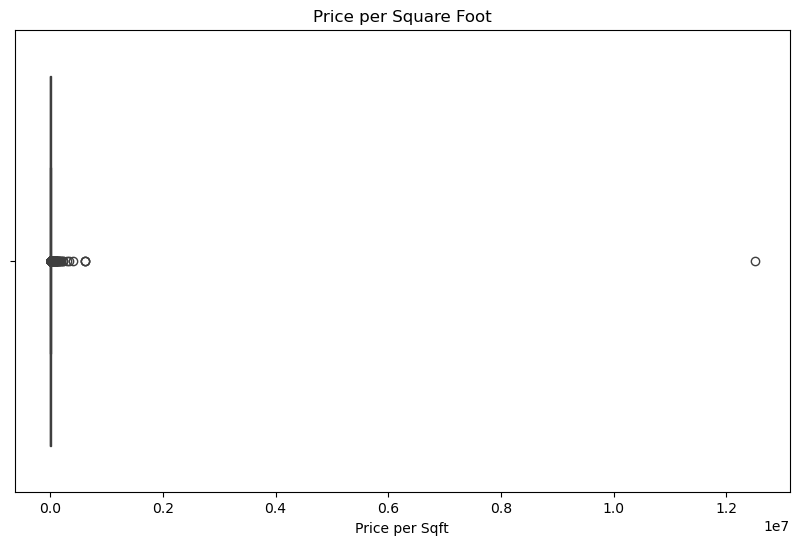

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = df["price_per_sqft"])
plt.title("Price per Square Foot")
plt.xlabel("Price per Sqft")
plt.show()

#### Remove Outliers in `price_per_sqft`

In [19]:
# Calculate Q1 and Q3 (25th and 75th percentiles)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within bounds (remove outliers)
df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

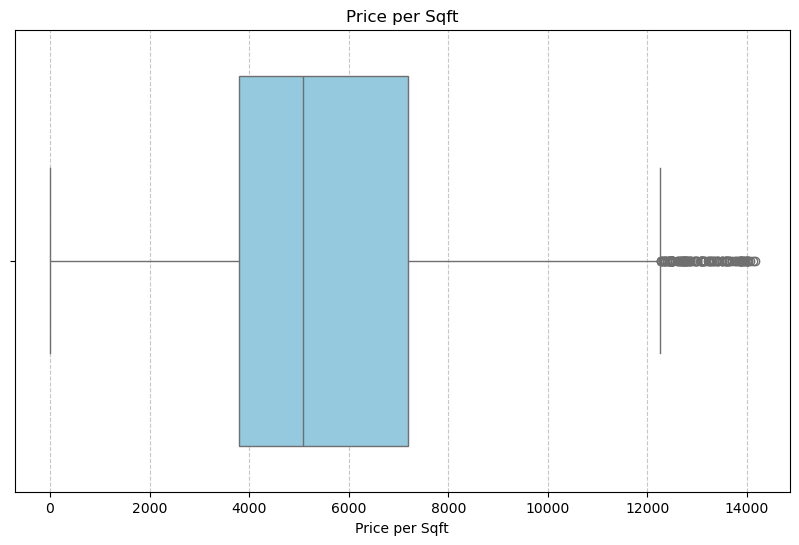

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = df["price_per_sqft"], color = "skyblue")
plt.title("Price per Sqft")
plt.xlabel("Price per Sqft")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068 entries, 0 to 4517
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   square_feet     4068 non-null   float64
 1   transaction     3982 non-null   object 
 2   status          4068 non-null   object 
 3   furnishing      3825 non-null   object 
 4   facing          3630 non-null   object 
 5   price_per_sqft  4068 non-null   float64
 6   price           4068 non-null   float64
 7   computed_price  4068 non-null   float64
dtypes: float64(4), object(4)
memory usage: 286.0+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
square_feet,4068.0,3.217145e+03,6.655610e+04,110.000000,9.242500e+02,1.317500e+03,2.090750e+03,4.198405e+06
price_per_sqft,4068.0,5.752385e+03,2.720956e+03,1.052632,3.794902e+03,5.074972e+03,7.181666e+03,1.415425e+04
price,4068.0,1.109248e+07,2.696542e+07,100000.000000,4.277500e+06,7.000000e+06,1.260000e+07,1.463300e+09
computed_price,4068.0,1.109248e+07,2.696542e+07,100000.000000,4.277500e+06,7.000000e+06,1.260000e+07,1.463300e+09


#### `One-Hot Encode` Categorical Columns

In [24]:
cat_cols = ['transaction', 'furnishing', 'facing', 'status']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4068 entries, 0 to 4517
Columns: 388 entries, square_feet to status_Resale
dtypes: bool(384), float64(4)
memory usage: 1.6 MB


In [26]:
df.isnull().sum()

square_feet                 0
price_per_sqft              0
price                       0
computed_price              0
transaction_10 m            0
                           ..
status_Poss. by Sep '25     0
status_Poss. by Sep '26     0
status_Power Of Attorney    0
status_Ready to Move        0
status_Resale               0
Length: 388, dtype: int64

#### Model Evaluation

In [27]:
# Define features (X) and target (y) from the DataFrame
X = df.drop('computed_price', axis=1)
y = df['computed_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


In [28]:
df.to_csv("cleaned_version.csv")